In [15]:
# Polynomial Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Importing the dataset
!curl https://raw.githubusercontent.com/muke888/UdemyMachineLearning/master/Part2-3.Polynomial%20Regression/Position_Salaries.csv -o Position_Salaries.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   246  100   246    0     0   4392      0 --:--:-- --:--:-- --:--:--  4392


In [19]:
#Dataset too small to split into train and test sets

dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [20]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [21]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

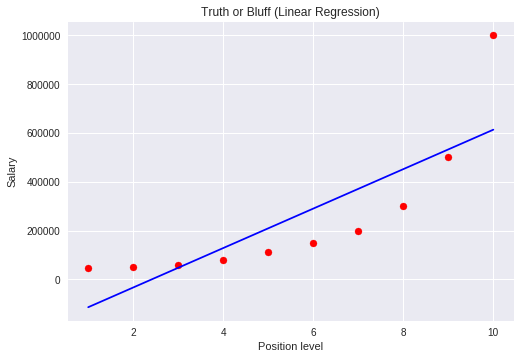

In [23]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

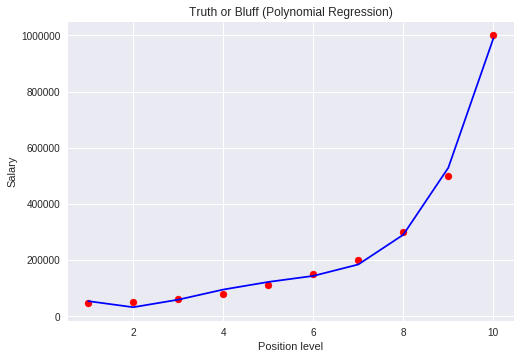

In [24]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


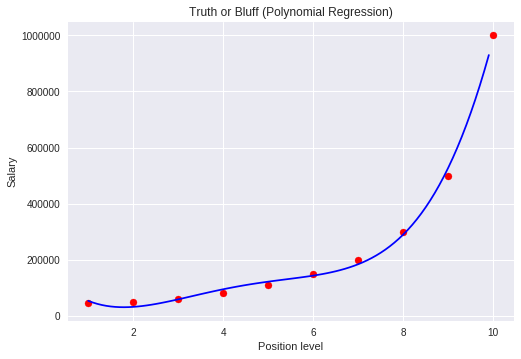

In [25]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
#Increasing X-points for smoother display
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [41]:
# Predicting a new result with Linear Regression
# Note that input must be 2d array, which can be produced through .reshape(-1,1) or .reshape(1,-1)
lin_reg.predict([[6.5]])

array([330378.78787879])

In [42]:
# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])